# Diamonds Dataset Exploratory and Explanatory Visualization - A Case Study
## Introduction
In this case study, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

The dataset consists of almost 54,000 rows and 10 columns:
* `price`: Price in dollars. Data were collected in 2008.
* `carat`: Diamond weight. 1 carat is equal to 0.2 grams.
* `cut`: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
* `color`: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
* `clarity`: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
* `x`, `y`, `z`: Diamond length, width, and depth, respectively, in mm.
* `table`: Ratio of the width of the top face of diamond to its overall width, as a percentage.
* `depth`: Proportional depth of the diamond, as a percentage. This is computed as 2 * `z` / (`x` + `y`), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only on the variables in the top five bullet points: `price` and the four 'C's of diamond grade. Our focus will be on answering the question about; 
>the degree of importance that each of these quality measures has on the **pricing** of a diamond

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data into pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

In [3]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
diamonds.shape

(53940, 10)

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We'll need to convert `cut`, `color` and `clarity` into ordered Categorical data types.

In [6]:
print(diamonds.cut.unique())
print(diamonds.color.unique())
print(diamonds.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
# ordering from 'worst' to 'best'
cut = ['Fair','Good','Very Good','Premium','Ideal']
color = ['J','I','H','G','F','E','D']
clarity = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

## reversing order
cut.reverse(), color.reverse(), clarity.reverse()

# creating the CategoricalDtype
cutClass = pd.api.types.CategoricalDtype(categories=cut, ordered=True)
colorClass = pd.api.types.CategoricalDtype(categories=color, ordered=True)
clarityClass = pd.api.types.CategoricalDtype(categories=clarity, ordered=True)

# applying convertion to variables in dataframe
diamonds['cut'] = diamonds['cut'].astype(cutClass)
diamonds['color'] = diamonds['color'].astype(colorClass)
diamonds['clarity'] = diamonds['clarity'].astype(clarityClass)

In [8]:
diamonds[['cut','color','clarity']].dtypes

cut        category
color      category
clarity    category
dtype: object

In [9]:
for i in ['cut','color','clarity']:
      print(f'{i}:')
      print('  {}'.format(diamonds[i].cat.categories))

cut:
  Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')
color:
  Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')
clarity:
  Index(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype='object')


## Univariate Exploration
### Price
Let's start our exploration by looking at the main variable of interest: **`price`**. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

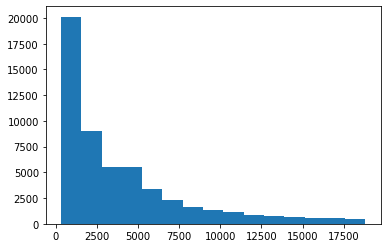

In [10]:
plt.hist(diamonds.price, bins=15);

From the histogram, we can see that the diamond price variable is highly skewed to the right. Let's apply a log-scale transformation to dig more into this.

How to get the bins to use;
* Find the min and max values for price
* Get the base 10 log of both
* Add 0.1 to the end of the max
* Create a range of values from min to max+0.1
* Get a list of values with 10's raised to the values in range

In [11]:
from math import log10

In [12]:
# min and max
print(diamonds.price.min())
print(diamonds.price.max())

326
18823


In [13]:
# find log10 of both
print(log10(326))
print(log10(18823))

2.513217600067939
4.274688842237558


Check out a trick I used to get the ticks

In [14]:
logBin_list = []
for x in np.arange(2.5, 4.3+0.1, 0.1):
      logBin_list.append(10**x)

# get length of list
len(logBin_list)   

19

In [15]:
# approx the values to get the ticks
print(logBin_list[::3])

[316.22776601683796, 630.9573444801937, 1258.9254117941687, 2511.886431509585, 5011.872336272735, 10000.00000000004, 19952.62314968887]


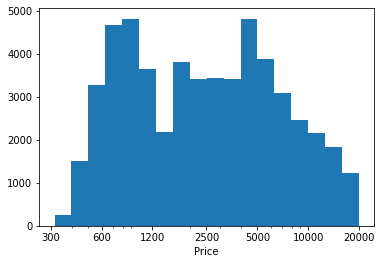

In [16]:
# create bins
bins = 10 ** np.arange(2.5, 4.3+0.1, 0.1)

# generatr the x-ticks you want to apply
ticks = [300, 600, 1200, 2500, 5000, 10000, 20000]
# convert ticks into string values to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# plot the histogram
plt.hist(x=diamonds.price, bins=bins)
plt.xscale('log') # applying log transformation

# apply x-ticks
plt.xticks(ticks, labels)
plt.xlabel('Price');

Under a log scale, we can notice that the data is roughly bimodal, with one large peak somewhere between 600 and 1000 and a second large peak between 4000 and 5000. Also, the price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

### Carat weights

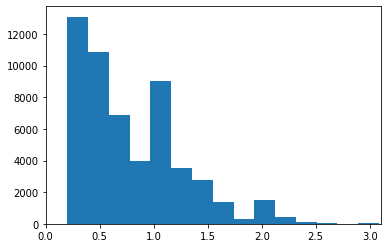

In [17]:
plt.hist(diamonds.carat, bins=25)
plt.xlim(0,3.1); # zooming in

Notice the interesting pattern? There is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. Let's use smaller bin sizes to clearly see the spikes in the data values.

In [18]:
diamonds.carat.describe().iloc[[3,7]]

min    0.20
max    5.01
Name: carat, dtype: float64

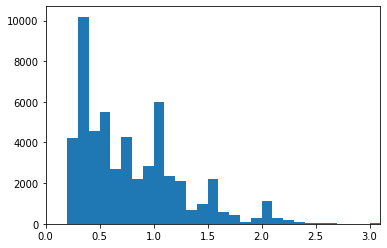

In [19]:
bins = np.arange(0.2,5+0.1,0.1)

plt.hist(diamonds.carat, bins=bins);
plt.xlim(0,3.1);

Let's still go deeper, using a binsize of 0.01

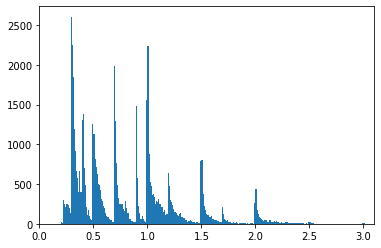

In [20]:
bins = np.arange(0.2,5.1,0.01)

plt.hist(diamonds.carat, bins=bins);
plt.xlim(0,3.1);

Notice the many peaks

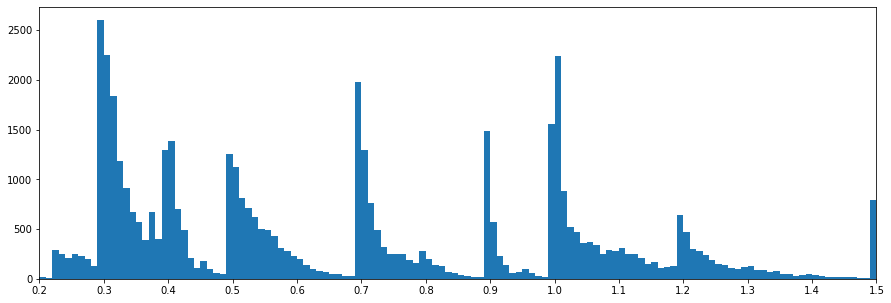

In [21]:
plt.figure(figsize=(15,5))
plt.hist(diamonds.carat, bins=bins)
plt.xticks(np.arange(0.2,1.6,0.1))
plt.xlim(0.2,1.5);

Notice the rising and falling trend. Perhaps these spikes come about as part of standard diamond size conventions. Hmmm.

### Cut

In [22]:
base_color = sns.color_palette()[0]

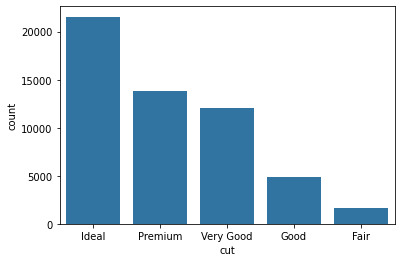

In [23]:
sns.countplot(x=diamonds.cut,color=base_color);

Here we can see the mode cut quality for diamonds in this dataset is 'Ideal'. There is a consistent decrease in number of diamonds of lower cut grades.

### Color

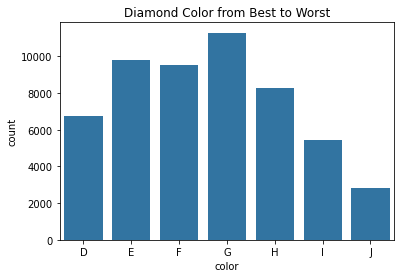

In [24]:
sns.countplot(x=diamonds.color,color=base_color)
plt.title("Diamond Color from Best to Worst");

The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G.

### Clarity

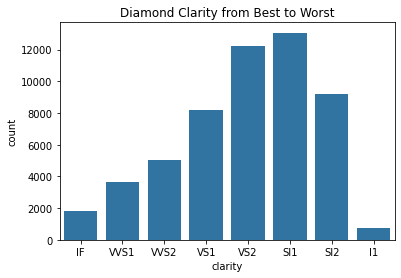

In [25]:
sns.countplot(x=diamonds.clarity, color=base_color)
plt.title("Diamond Clarity from Best to Worst");

There is a left-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

## Bivariate Exploration
Okay, we've look at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color and clarity. Now we will investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

### Price vs Carat
Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. 

Also, recall that the price distribution suggests a logarithmic transformation due to its very long tail (refer up). Remember to add that to your 'price'-axis/

In [26]:
diamonds.shape

(53940, 10)

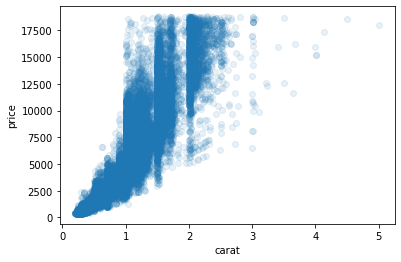

In [27]:
sns.regplot(data=diamonds, x='carat', y='price',
            fit_reg=False, scatter_kws={'alpha':1/10});

Now, because of the skewed nature of the price variable, let's apply a log transform to it.

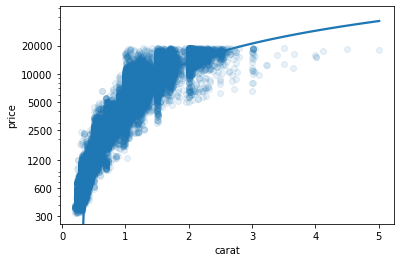

In [32]:
# generatr the x-ticks you want to apply
ticks = [300, 600, 1200, 2500, 5000, 10000, 20000]
# convert ticks into string values to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# scatterplot with transparent values
sns.regplot(data=diamonds, x='carat', y='price',
            fit_reg=True, #line_kws={'color':'black'},
            scatter_kws={'alpha':1/10})
# apply log transform to the y axis
plt.yscale('log')
plt.ylim(250,)

# apply y-ticks
plt.yticks(ticks, labels);


After the transformation, notice that the scatterplot has changed from looking concave upwards (like an upwards-pointing bowl) to concave downwards (like a downwards-pointing bowl). It would be nice to have a linear trend.

It turns out that `x`, `y`, and `z` dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. 

It was found that ["Mathematically, the diameter in millimeters of a round brilliant should be approximately equal to 6.5 times the cube root of carat weight.](https://www.cs.mcgill.ca/~rwest/wikispeedia/wpcd/wp/d/Diamond.htm)

![cubediamcaratweight](https://math.andyou.com/content/01/03/images/mu_wsa_01_03_021.png)

Therefore, a cube-root transformation, should allow us to see an approximate linear trend.

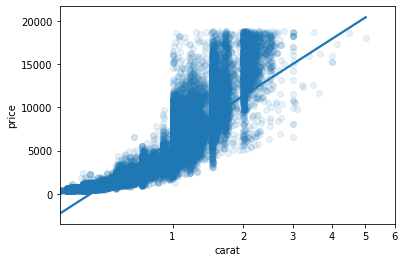

In [40]:
# cube root transformation
diamonds['carat_cbrt'] = np.cbrt(diamonds.carat)

# let's place the proper carat value at its cuberoot
ticks = np.arange(7) # gen 0 to 6
cbrt_ticks = np.cbrt(ticks) # get the cube root values of ticks
# convert ticks into string values to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]


# scatterplot with transparent values
sns.regplot(data=diamonds, x='carat_cbrt', y='price',
            fit_reg=True, #line_kws={'color':'black'},
            scatter_kws={'alpha':1/10})

plt.xlabel('carat')
plt.xticks(ticks=cbrt_ticks, labels=labels)
plt.xlim(np.cbrt(0.2),); # starting from the minimum carat

One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

### Price vs Cut, Clarity, Color
Numerical by ordinal categorical variable.

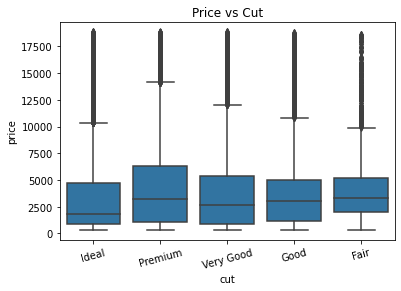

In [53]:
# plot a box plot
sns.boxplot(data=diamonds, x='cut', y='price',
            color=base_color)
plt.title("Price vs Cut")
plt.xticks(rotation=15);

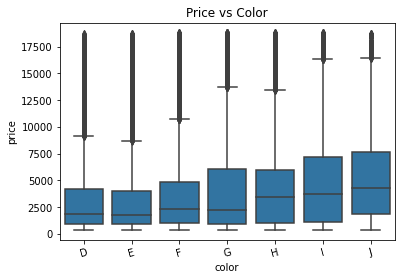

In [54]:
# plot a box plot
sns.boxplot(data=diamonds, x='color', y='price',
            color=base_color)
plt.title("Price vs Color")
plt.xticks(rotation=15);

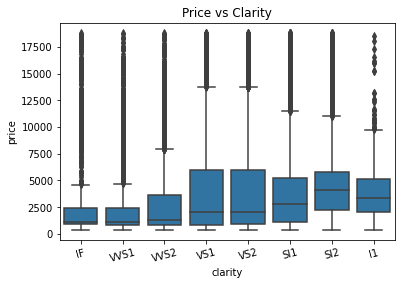

In [55]:
# plot a box plot
sns.boxplot(data=diamonds, x='clarity', y='price',
            color=base_color)
plt.title("Price vs Clarity")
plt.xticks(rotation=15);

Notice something interesting and unintuitive? The median price of diamonds tends to look like it decreases with increasing gem quality. Shouldn't we expect this to be the other way round? This deserves a deeper look.

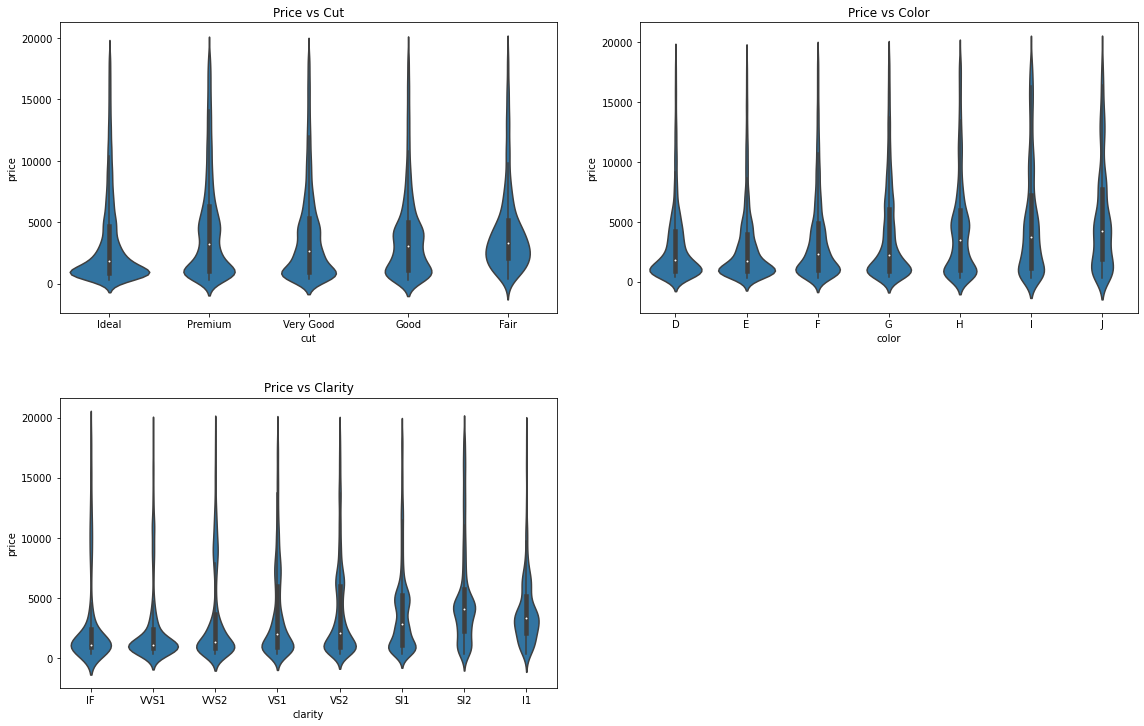

In [76]:
# plot 3 plots in one figure
plt.figure(figsize=[16,10])

# top left plot
plt.subplot(2,2,1)
plt.title('Price vs Cut')
sns.violinplot(data=diamonds, x='cut', y='price',
               color=base_color)
# top right plot
plt.subplot(2,2,2)
plt.title('Price vs Color')
sns.violinplot(data=diamonds, x='color', y='price',
               color=base_color)

# bottom left plot
# left top plot
plt.subplot(2,2,3)
plt.tight_layout(h_pad=5, w_pad=3)
plt.title('Price vs Clarity')
sns.violinplot(data=diamonds, x='clarity', y='price',
               color=base_color);

For each ordinal variable, there are multiplt modes into which prices appear to fall. Going across increasing quality levels, the modes ,which unfortunately I don't see, rise in price - this should be the expected effect of quality. However, we can also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result. 

This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

### Carat vs Cut, Clarity, Color

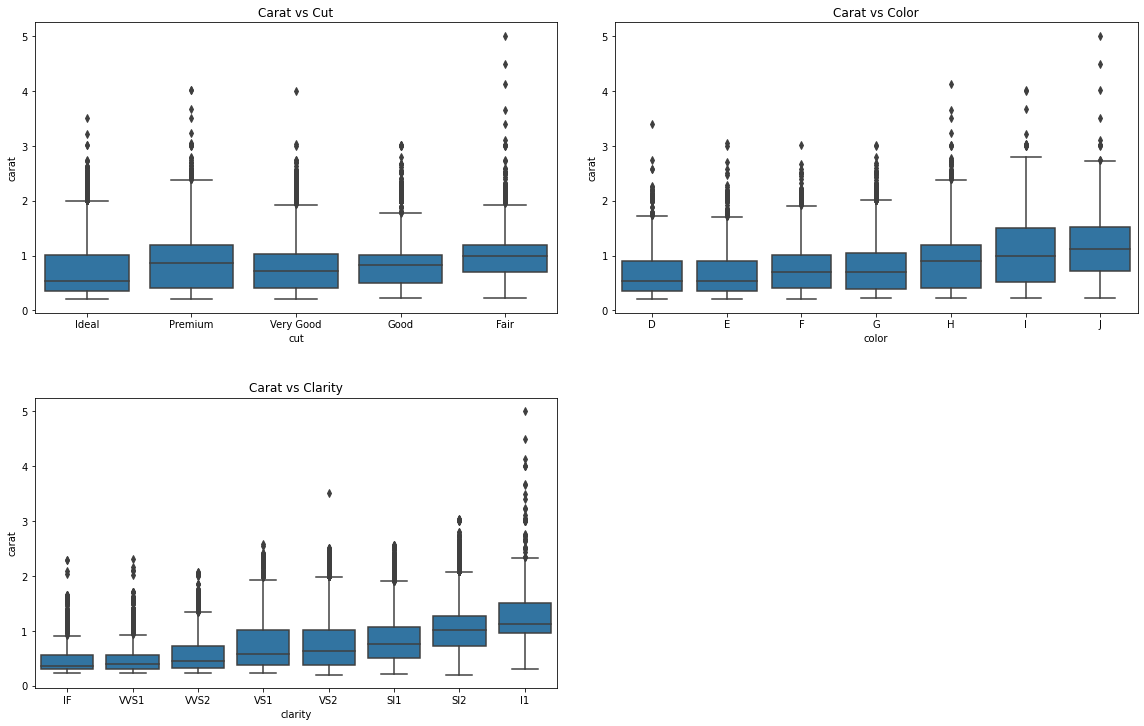

In [80]:
# plot 3 plots in one figure
plt.figure(figsize=[16,10])

# top left plot
plt.subplot(2,2,1)
plt.title('Carat vs Cut')
sns.boxplot(data=diamonds, x='cut', y='carat',
            color=base_color)
# top right plot
plt.subplot(2,2,2)
plt.title('Carat vs Color')
sns.boxplot(data=diamonds, x='color', y='carat',
            color=base_color)

# bottom left plot
# left top plot
plt.subplot(2,2,3)
plt.tight_layout(h_pad=5, w_pad=3)
plt.title('Carat vs Clarity')
sns.boxplot(data=diamonds, x='clarity', y='carat',
            color=base_color);

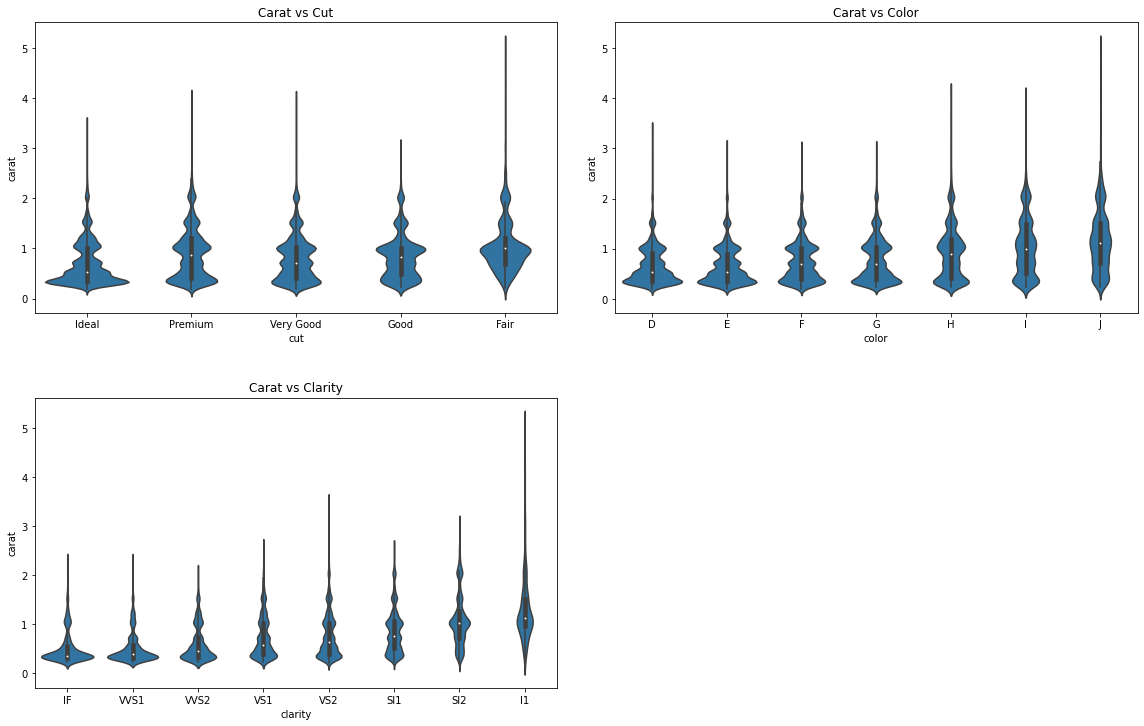

In [78]:
# plot 3 plots in one figure
plt.figure(figsize=[16,10])

# top left plot
plt.subplot(2,2,1)
plt.title('Carat vs Cut')
sns.violinplot(data=diamonds, x='cut', y='carat',
               color=base_color)
# top right plot
plt.subplot(2,2,2)
plt.title('Carat vs Color')
sns.violinplot(data=diamonds, x='color', y='carat',
               color=base_color)

# bottom left plot
# left top plot
plt.subplot(2,2,3)
plt.tight_layout(h_pad=5, w_pad=3)
plt.title('Carat vs Clarity')
sns.violinplot(data=diamonds, x='clarity', y='carat',
               color=base_color);

These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.